# BCPD use cases

## SAP HANA Connection

In [1]:
import hana_ml
import time
from hana_ml import dataframe
from hana_ml.algorithms.pal.tsa.changepoint import BCPD
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
conn = dataframe.ConnectionContext(address="hana-ml-api.hana-ml.c.ap-cn-1.cloud.sap",
                                   port=30015,
                                   user="PAL_TEST",
                                   password="Init1234")

## Dataset

In [2]:
def createTable(cc, ts, table_name):
    try:
        with cc.connection.cursor() as cur:
            cur.execute("SET SCHEMA DM_PAL;")
            cur.execute('DROP TABLE '+table_name)
    except:
        print('"DROP TABLE '+table_name+'" was unsuccessful. Maybe the table does not exist yet.')
    
    df = pd.DataFrame({'TIME_STAMP':[i for i in range(len(ts))],'SERIES':ts})   
    dt_ml = dataframe.create_dataframe_from_pandas(cc, df, table_name=table_name, force=True)
data1 = [369,657,544,623,615,773,449,531,717,778,907,517,402,691,623,583,479,529,540,289,51,89,57,36,10,31,7,38,10,11,7,8,3,7,3,1,5,-1,3,9]
data2 = [0,3.530127019,-5.930127019,-2.4,1.130127019,-8.330127019,-4.8,-1.269872981,-10.73012702,-7.2,-3.669872981,-13.13012702,-9.6,-6.069872981,-15.53012702,-12,-8.469872981,-17.93012702,-14.4,-10.86987298,-20.33012702,-16.8,-13.26987298,-22.73012702,-19.2,-15.66987298,-25.13012702,-25.13012702,-20.37484444,-22.19120076,-28.06905328,-29.8854096,-25.13012702,-20.37484444,-22.19120076,-28.06905328,-29.8854096,-25.13012702,-20.37484444,-22.19120076,-28.06905328,-29.8854096,-25.13012702,-20.37484444,-22.19120076,-28.06905328,-29.8854096,-25.13012702,-20.37484444,-22.19120076,-28.06905328,-29.8854096,5,8.909157412,9.874639561,7.169418696,2.830581304,0.125360439,1.090842588,5,8.909157412,9.874639561,7.169418696,2.830581304,0.125360439,1.090842588,5,8.909157412,9.874639561,7.169418696,2.830581304,0.125360439,1.090842588,5,8.909157412,9.874639561,7.169418696,2.830581304,0.125360439,1.090842588,5,8.909157412,9.874639561,7.169418696,2.830581304,0.125360439,1.090842588]
data3 = [2604.324463,2562.364258,2606.271973,2598.863281,2527.756348,2603.943115,2596.208984,2588.92041,2604.076172,2603.418945,2606.257324,2644.703369,2594.632568,2604.765869,2593.974121,2573.091553,2599.448975,2615.815674,2600.829102,2528.434082,2608.432617,2614.852295,2588.766846,2595.681152,2636.297607,2601.117676,2606.94165,2607.885742,2607.264893,2601.664063,2591.944336,2562.548096,2580.687988,2575.574219,2638.153564,2594.051758,2617.903564,2588.861816,2571.924561,2606.108398,2575.539551,2620.813721,2574.302734,2596.246094,2626.624023,2653.010986,2569.321533,2595.16333,2587.979248,2584.644287,2599.320068,2619.16748,2601.263672,2608.764404,2580.675293,2647.795898,2604.788086,2623.68042,2611.694336,2603.083984,2607.471436,2595.73877,2611.597412,2579.795654,2584.988037,2623.43042,2598.753174,2615.53833,2617.332764,2559.980469,2612.152344,2632.639404,2608.150879,2600.129883,2609.968262,2579.539551,2613.9646,2609.168701,2562.88623,2591.457764,2606.011719,2608.979736,2576.405518,2605.705566,2618.656006,2583.152832,2592.042236,2615.218506,2593.640625,2598.87793,2591.882324,2573.380127,2605.614258,2592.553955,2599.182129,2643.135742,2582.684082,2568.853271,2598.752441,2634.056152,2584.643555,2605.797607,2592.636963,2582.202637,2598.901123,2599.797119,2647.578857,2583.720459,2576.855225,2610.174316,2610.33667,2628.503906,2602.490723,2599.749756,2571.557861,2635.742676,2620.742188,2606.394287,2591.523438,2596.667236,2613.465088,2615.584717,2599.024414,2557.780518,2588.777344,2622.210205,2619.714844,2540.174072,2586.062744,2619.751221,2635.999268,2590.89502,2581.98999,2597.845947,2586.654053,2601.611084,2577.445557,2591.669922,2605.486816,2590.078125,2625.092773,2603.513916,2615.849121,2594.301758,2594.838867,2626.303711,2608.784912,2583.365234,2597.029785,2570.866455,2587.174072,2611.256592,2600.568848,2605.241699,2571.01001,2558.381104,2628.158447,2587.319336,2578.510986,2603.445801,2623.540771,2602.233887,2579.172852,2557.154297,2591.159424,2607.99585,2592.577637,2495.981934,2563.498047,2488.3396,2504.717285,2510.409668,2515.128174,2503.910889,2487.521729,2487.148193,2506.393555,2419.393311,2451.133301,2441.14209,2453.975098,2448.733398,2439.909668,2418.02417,2425.104736,2472.533691,2459.410156,2385.818359,2413.533691,2401.63623,2405.593018,2379.191406,2400.190918,2388.73291,2401.838623,2396.568848,2381.969238,2351.97998,2324.597168,2364.400879,2336.766846,2294.455566,2277.428955,2338.564697,2309.687012,2285.918701,2236.003662,2202.822266,2254.469727,2222.730225,2208.141602,2220.174561,2195.220703,2173.23877,2153.796631,2154.268311,2163.823242,2192.950684,2146.345703,2185.086426,2170.386963,2146.504395,2196.773682,2165.848877,2160.083008,2148.302734,2126.656738,2102.352783,2072.669434,2095.821289,2088.1521,2096.606934,2054.559082,2094.291504,2073.806152,2052.095215,2067.401123,2076.317383,2051.112549,2024.135986,2102.601074,2101.250244,2023.605225,2029.275757,2028.162109,2033.783936,2018.193115,2031.897705,2004.178467,2037.292236,2063.219727,2059.397949,2033.071411,2033.182739,1996.921997,2038.038086,2020.698853,2016.332886,2034.321411,2011.6521,2055.023682,2031.989746,2048.401123,2032.307983,2031.255615,2021.575806,2057.332031,2011.980469,1972.995239,2005.572754,2029.020264,2032.695313,1993.659424,1968.460083,2012.064209,2025.466797,2002.815918,2001.862915,2004.050781,1979.18689,1984.856323,2023.95166,2007.854126,2041.178345,1997.588135,2005.963989,2028.450073,1959.125122,2009.713623,2000.304077,2006.658813,1940.295898,2046.434082,2031.457642,1959.64502,1949.962036,1998.057129,1967.755127,1963.090332,2009.147705,1958.779175,1996.078491,1984.627197,1986.949707,2016.246338,2009.085693,2038.172852,2044.688232,2020.074585,2019.404785,2051.999756,2028.604492,1982.477051,2046.395142,2024.950806,2015.444458,2045.768188,2053.839844,2031.944824,2012.367432,2036.537231,2039.72583,1969.67749,1962.569336,1995.974121,1995.124268,1994.643555,2004.481812,1963.69043,1977.661499,1933.04248,1955.587524,1986.171143,1953.773193,1929.195679,1968.442139,1975.401733,1951.784302,1961.45752,1932.243042,1900.803101,1873.296265,1858.085815,1933.928223,1924.327637,1886.536865,1940.067871,1917.180786,1953.920166,1946.867188,1911.945679,1920.313965,1913.414063,2003.711426,1921.281738,1925.490723,1901.177734,1967.311768,1984.444458,1941.69873,1930.040039,1957.069702,1983.506348,1964.269287,1971.411255,1993.245361,1931.009644,1942.817749,1960.429077,1985.458008,1998.634888,1996.665649,1959.23291,1992.055664,2032.613037,1997.174805,1999.89502,2018.893188,1994.407227,2024.970337,1999.456665,1997.953369,1990.245361,2029.752563,2004.783813,1987.488281,2021.672974,2028.58667,2012.777832,2034.036865,2029.652832,2072.33667,2055.893799,2074.993408,2118.058838,2085.433838,2071.560303,2106.354736,2145.338867,2054.909424,2096.115723,2108.492676,2079.760986,2121.186523,2147.005859,2211.185791,2173.716064,2207.160645,2208.999023,2211.4104,2200.881592,2213.385254,2203.879883,2247.092773,2259.213623,2315.973145,2329.512207,2270.862793,2353.952637,2323.408203,2354.971191,2338.340332,2352.064697,2359.307617,2306.179688,2328.558594,2296.864014,2273.603516,2306.9021,2274.156738,2252.263184,2271.572266,2223.888672,2296.012451,2298.891357,2317.161133,2350.172607,2321.313721,2284.996826,2293.656494,2300.667725,2332.062012,2291.034424,2357.234863,2335.855225,2291.046387,2249.943604,2323.890381,2300.671387,2291.960938,2308.508301,2284.961426,2301.71875,2281.806396,2311.49585,2286.904785,2315.083008,2328.844238,2377.952393,2297.785156,2364.999023,2351.996338,2335.195557,2324.672119,2412.916016,2378.093994,2360.566406,2347.29248,2304.855957,2318.988281,2275.452637,2279.212891,2274.373535,2251.870117,2287.896484,2355.507568,2323.994385,2408.84668,2454.552979,2420.662842,2434.169678,2485.587402,2496.911133,2510.539551,2487.775146,2517.598877,2458.515137,2410.977051,2385.226318,2406.386719,2387.987305,2391.7854,2423.462158,2435.331055,2383.203125,2307.009033,2287.873535,2318.351318,2362.828613,2378.79126,2362.381104,2315.230225,2399.177246,2328.172607,2401.442871,2418.795898,2409.308838,2468.486084,2518.275879,2545.804932,2462.908691,2478.517578,2515.606689,2523.012695,2522.175049,2498.790283,2456.493652,2473.180908,2515.710938,2531.084717,2534.206543,2547.723633,2612.682617,2599.623535,2617.920166,2578.268066,2630.184082,2578.363281,2569.807129,2568.750244,2602.417236,2636.257568,2615.335693,2587.027588,2595.55835,2616.007324,2626.336426,2581.678467,2581.436279,2621.421631,2597.803223,2604.94165,2608.769043,2627.731689,2630.762207,2610.900391,2627.133301,2574.588867,2622.737549,2615.52002,2560.423096,2590.554932,2583.365234,2613.603516,2607.335693,2605.272949,2590.493652,2539.455322,2550.66748,2617.937744,2645.128174,2581.613037,2627.204102,2611.249756,2584.128662,2578.491943,2607.702637,2620.5271,2532.478271,2563.315918,2607.0896,2596.7771,2600.547119,2547.44165,2527.911621,2549.535645,2606.879883,2591.302002,2625.344971,2629.422119,2584.251953,2573.708496,2627.045654,2626.826904,2557.553223,2585.650635,2585.581787,2596.861084,2579.135498,2563.58252,2566.891602,2586.446289,2608.835938,2640.94043,2598.120605,2583.48999,2620.289307,2582.814453,2521.923584,2596.60376,2602.673584,2611.166748,2601.044922,2636.626221,2563.945557,2608.999756,2568.75,2613.278809,2587.272705,2610.770264,2600.504883,2559.981689,2623.702881,2612.412598,2621.922607,2578.9646,2567.262451,2517.539307,2661.971191,2625.983398,2596.460205,2586.435547,2574.416748,2606.777832,2601.20166,2590.514648,2588.745605,2591.794922,2632.426758,2599.930908,2556.771729,2611.037842,2600.067871,2593.914551,2554.692627,2608.512939,2626.165283,2580.011963,2599.491943,2620.630371,2543.028809,2569.709229,2636.383789,2585.720703,2600.169922,2642.503418,2591.136719,2602.711426,2575.154053,2593.285156,2618.337402,2593.428711,2596.645508,2568.432861,2619.509277,2571.703369,2612.688965,2629.200195,2571.052246,2531.706787,2590.778809,2644.22168,2604.407227,2609.792236,2581.280518,2613.765381,2622.635498,2620.183105,2585.530518,2570.818115,2614.780273,2595.717041,2563.067139,2661.712891,2552.547363,2609.314209,2610.641602,2582.352539,2607.296143,2580.118164,2588.829102,2538.102783,2487.172363,2498.946533,2446.915771,2416.489746,2417.996582,2423.274414,2528.849365,2563.293457,2600.828613,2591.18335,2585.409912,2582.682617,2636.856934,2563.920654,2634.466797,2611.800049,2641.654541,2538.094971,2599.58667,2625.8396,2569.291992,2588.592529,2618.855469,2574.968262,2617.018555,2625.215332,2607.878662,2640.700684,2562.418457,2573.346436,2623.668945,2561.013428,2603.944824,2607.733643,2584.064209,2578.189941,2624.132568,2591.752197,2572.223389,2645.899902,2536.241699,2636.593262,2587.17627,2610.698486,2575.40332,2642.583008,2606.590332,2590.384521,2568.931641,2582.568848,2581.12793,2588.556885,2591.960449,2602.80249,2612.604248,2582.806152,2595.679932,2623.798096,2576.167725,2581.594727,2471.436035,2403.63623,2392.322266,2397.928223,2370.796631,2412.554688,2329.404053,1504.72644,354.4973145,1738.440552,2428.018311,2389.581055,2307.805908,2343.080078,2207.444092,1860.142456,1788.482056,1818.106079,1201.537354,157.0614014,20.00717354,2.282406807,2.252375126,2.222343445,2.192311764,2.162280083,2.132248402,2.102216721,2.07218504,2.042153358,2.012121677,1.982090116,1.952058434,1.922026753,1.891995072,1.861963391,1.83193171,1.801900029,1.771868467,1.741836786,1.711805105,1.681773424,1.651741743,1.621710062,1.591678381,1.5616467,1.531615019,1.501583457,1.471551776,1.441520095,1.411488414,1.381456733,1.351425052,1.321393371,1.29136169,1.261330009,1.231298447,1.201266766,1.171235085,1.141203403,1.111171722,1.081140041,1.05110836,1.021076679,0.991045058,0.961013377,0.930981696,0.900950015,0.870918393,0.840886712,0.810855031,0.78082335,0.750791728,0.720760047,0.690728366,0.660696685,0.630665004,0.600633383,0.570601702,0.540570021,0.51053834,0.480506688,0.450475007,0.420443356,0.390411675,0.360380024,0.330348343,0.300316691,0.27028501,0.240253344,0.210221678,0.180190012,0.150158346,0.120126672,0.090095006,0.060063336,0.030031668,0.0,368.2749329,1851.342041,2235.637695,1895.389282,1797.44165,1834.866089,1770.915283,1810.302124,1809.859619,1787.546387,1688.551147,221.2064667,28.43895531,4.084641933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302063942,94.5901413,1040.269653,2156.692627,1811.983276,1749.482056,1821.574951,1814.303223,1757.424561,1832.337158,1780.071289,1738.697632,1841.807495,1800.935791,1829.545898,1800.764404,1784.860107,1811.376343,1780.304688,1816.302002,1825.913696,1782.480469,1804.099121,1790.658447,1770.300293,1787.749268,1822.746826,1777.768799,1792.99292,1802.896973,1827.144653,1786.723999,1834.571777,1783.830078,1773.123413,1795.029663,1816.540649,1819.750488,336.7842102,44.23958588,5.022488117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.991805077,54.97009277,1575.822754,1823.56189,1815.681885,1834.805298,1809.278076,1804.123291,1781.599121,1802.508545,1810.302246,1777.580322,1808.327637,1825.343018,1755.210693,1819.362305,1810.407715,1822.991577,1765.795166,1807.602173,1764.845947,1836.9823,1806.239014,1823.593994,1768.457153,1788.56604,1794.04248,1802.694458,1821.937012,1817.78479,1824.234985,1821.437256,1806.953125,1782.06189,1787.921875,1844.364502,1804.777344,1770.717407,1810.058228,1774.601807,1841.455688,1773.947266,1798.769775,1765.560303,1825.925903,1797.655273,1814.386108,1813.38501,1809.576294,1797.289795,1779.557129,1821.28125,1805.584229,1776.076904,1782.868408,1816.922607,1777.617432,1810.784302,1776.226929,1803.714233,1802.429199,1826.214233,1773.898682,1814.689331,1798.60083,1745.537476,1841.96106,1971.51709,2007.765869,1999.828613,2025.056152,1998.914673,2006.416382,1996.606567,1988.069336,1968.628418,1976.557495,2011.55249,2013.421631,2016.113037,1972.238159,2003.022095,2037.789307,1967.223145,1998.453857,1985.252686,2006.399658,1988.79126,1994.683228,1987.425415,2006.964966,1987.787842,1993.529541,2063.566406,2000.207397,1990.585815,1983.663574,2082.013672,2094.288574,2144.415283,2095.643066,2079.151855,2120.040039,2140.736084,2213.209473,2184.314941,2160.879639,2209.959473,2180.751221,2194.841309,2198.220215,2212.690674,2201.102051,2230.880615,2178.986084,2238.961426,2187.756592,2170.874756,2207.287598,2275.71582,2317.481934,2315.795898,2303.992432,2290.042725,2296.414795,2291.931641,2300.090576,2336.583496,2333.044434,2323.51416,2266.18457,2310.634277,2351.627686,2372.954834,2419.243408,2377.821045,2414.222168,2410.449951,2404.00293,2368.40332,2413.18457,2381.428711,2456.721436,2615.947754,2626.982422,2606.522461,2605.270752,2597.391602,2585.743164,2600.458984,2627.467773,2631.717529,2602.971436,2617.796143,2586.72168,2573.007324,2588.740234,2609.52002,2587.416748,2596.051514,2596.597168,2598.258545,2607.871826,2599.12793,2627.075195,2626.14502,2579.452148,2605.533203,2569.598389,2598.563721,2599.31958,2634.245117,2599.954102,2586.264404,2586.344482,2580.023438,2548.739502,2624.665527,2579.549316,2524.389648,2515.190674,2503.839111,2485.146729,2505.923584,2511.094971,2492.315186,2501.98877,2523.067627,2503.02832,2520.529541,2464.115234,2511.012207,2513.978027,2490.920898,2507.378418,2457.698242,2479.567383,2535.106689,2497.853027,2431.501221,2505.945557,2554.974365,2524.95459,2466.218506,2454.422363,2510.583496,2500.878906,2489.250732,2481.742188,2498.4021,2495.820557,2517.560547,2445.870361,2452.525635,2427.529785,2449.519287,2485.763184,2450.139404,2423.38623,2451.858154,2453.91333,2483.360352,2439.662842,2450.588135,2429.431641,2474.266113,2430.686523,2463.924805,2456.299072,2428.587402,2446.174805,2457.388184,2430.679199,2449.093506,2409.963379,2475.043945,2489.638428,2429.29541,2467.612061,2422.077148,2432.990967,2453.721924,2444.493164,2462.560059,2453.875,2487.687256,2411.287354,2450.817871,2457.645996,2456.366211,2464.773193,2473.697021,2437.261963,2387.973633,2434.731689,2478.103271,2494.850342,2460.893066,2428.044922,2467.89209,2466.215332,2471.431152,2366.749268,2477.102051,2458.479736,2472.423096,2455.063721,2415.282715,2468.785645,2443.259277,2450.126221,2438.374512,2478.019043,2443.226563,2450.366455,2425.095947,2461.719238,2458.883057,2441.480225,2458.820313,2458.876221,2436.85376,2419.109131,2455.39502,2448.753418,2455.889893,2451.732666,2453.510254,2424.842285,2453.704346,2464.823242,2430.874268,2415.172852,2448.229248,2482.663574,2420.185547,2445.713379,2449.387207,2452.365234,2438.613037,2432.68457,2450.355469,2475.806396,2441.951904,2448.800781,2434.499512,2428.638672,2431.234863,2457.016602,2472.008789,2467.38208,2457.256348,2444.485596,2454.180908,2424.37085,2433.430664,2454.902832,2424.375977,2474.027832,2448.160889,2420.046387,2472.210938,2463.587646,2440.14917,2385.18042,1242.072998,1062.177368,2091.20752,2357.248047,2445.893066,2452.370117,2454.506104,2462.491699,2444.835693,2463.170166,2453.009033,2443.577637,2442.997314,2443.804443,2451.916504,2430.098389,2442.981201,2448.100586,2487.131104,2459.922852,2443.546631,2484.769043,2431.527344,2431.236084,2469.411621,2428.168945,2430.636963,2443.755859,2439.445557,2459.673096,2427.650879,2473.6875,2459.983643,2458.175049,2452.850586,2463.491699,2500.945801,2445.863281,2435.106445,2473.185547,2417.04248,2428.984619,2464.48999,2445.633545,2461.642578,2427.262695,2429.853271,2441.337646,2439.771484,2459.948975,2470.612061,2448.431396,2447.813477,2439.973145,2478.611816,2440.382813,2459.817627,2459.849609,2449.365723,2439.040039,2415.717285,2434.240967,2509.573242,2465.021973,2457.841553,2449.358643,2455.615967,2451.755127,2472.586914,2422.854248,2481.541016,2419.51001,2475.266113,2456.614258,2454.756592,2435.710449,2466.508301,2437.377441,2448.678223,2464.085449,2471.470215,2427.104004,2428.08374,2458.602783,2463.054443,2442.766113,2424.522949,2478.721191,2438.319824,2441.560059,2475.866943,2448.935059,2446.779297,2400.019531,2466.162842,2465.244873,2454.579346,2473.581787,2465.346436,2488.291504,2447.555176,2441.845703,2473.777832,2446.890625,2427.051025,2451.78125,2444.76123,2419.638184,2475.297363,2470.756104,2458.718506,2455.146729,2426.430908,2439.936035,2451.449707,2441.129883,2455.845459,2476.240234,2445.05542,2446.062744,2466.173828,2422.763672,2428.386719,2439.358154,2452.716064,2451.738281,2443.579102,2461.79541,2454.967041,2429.820068,2473.173828,2443.026123,2450.539307,2465.100342,2466.7771,2433.110352,2433.010986,2442.379639,2447.23877,2464.383789,2457.545654,2402.31543,2485.532715,2431.375,2442.72998,2459.139404,2461.385742,2479.585205,2421.254639,2435.660156,2443.661621,2451.478516,2486.711914,2419.180176,2412.868164,2452.083008,2446.407471,2465.063721,2452.505127,2480.915771,2466.872559,2421.486572,2471.75415,2445.906982,2469.159668,2436.240234,2446.955811,2450.655029,2442.994629,2418.526611,2456.325195,2467.186523,2420.030273,2496.051514,2461.411133,2448.252686,2446.999756,2464.624023,2457.476563,2438.900879,2440.466553,2413.673584,2454.452148,2449.096191,2477.053467,2435.995605,2475.612305,2425.89624,2430.811279,2495.091797,2489.73877,2402.4375,2433.274414,2464.268799,2426.839111,2475.133789,2446.769531,2449.26123,2378.633057,2391.15918,2415.678467,2410.327148,2422.423584,2378.534668,2410.235107,2377.966553,2380.767578,2398.195557,2397.937744,2398.35083,2415.832031,2397.333496,2385.313721,2413.069336,2396.41626,2399.253906,2399.720947,2386.392578,2397.152344,2396.226318,2380.248291,2399.673096,2423.803223,2411.820801]
createTable(conn, data1, 'PAL_MOCKING_BCPD_DATA_1_TBL')
createTable(conn, data2, 'PAL_MOCKING_BCPD_DATA_2_TBL')
createTable(conn, data3, 'PAL_MOCKING_BCPD_DATA_3_TBL')

"DROP TABLE PAL_MOCKING_BCPD_DATA_1_TBL" was unsuccessful. Maybe the table does not exist yet.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


"DROP TABLE PAL_MOCKING_BCPD_DATA_2_TBL" was unsuccessful. Maybe the table does not exist yet.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.76it/s]


"DROP TABLE PAL_MOCKING_BCPD_DATA_3_TBL" was unsuccessful. Maybe the table does not exist yet.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


40


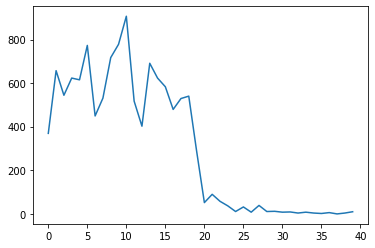

In [3]:
mocking_df = conn.table('PAL_MOCKING_BCPD_DATA_1_TBL')
print(len(mocking_df.collect()))
plt.plot(mocking_df.collect()["SERIES"])

87


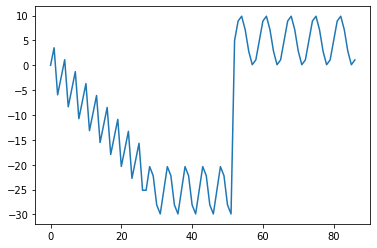

In [4]:
mocking_df2 = conn.table('PAL_MOCKING_BCPD_DATA_2_TBL')
print(len(mocking_df2.collect()))
plt.plot(mocking_df2.collect()["SERIES"])

1500


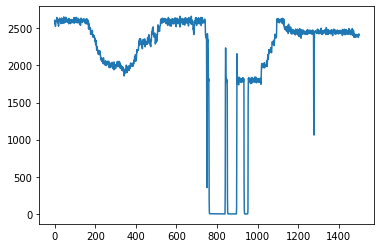

In [5]:
mocking_df3 = conn.table('PAL_MOCKING_BCPD_DATA_3_TBL')
print(len(mocking_df3.collect()))
plt.plot(mocking_df3.collect()["SERIES"])

## Use Case I : Detecting Changing Trend
In this use case, we will focus on detecting the change points in the trend part only.

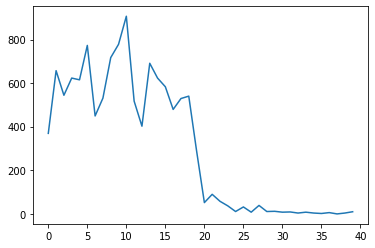

In [6]:
mocking_df = conn.table('PAL_MOCKING_BCPD_DATA_1_TBL')
plt.plot(mocking_df.collect()["SERIES"])

In [7]:
from hana_ml.algorithms.pal.tsa.changepoint import BCPD
#tcp: locations of trend change points
#scp: locations of seasonal change points
#period: the period of each seasonal segment
#components: decomposition values of the time series
# need to set max_scp=0 and max_harmonic_order=0 at the same time
tic = time.perf_counter()
bcpd = BCPD(max_tcp=5, 
            max_scp=0, 
            max_period=1, 
            max_harmonic_order=0, 
            random_seed=1, 
            max_iter=10000)
tcp, scp, period, components = bcpd.fit_predict(data=mocking_df)
toc = time.perf_counter()
print('time is %.4f s' % (toc-tic))
print(tcp.collect())
print(scp.collect())
print(period.collect())
print(components.head(10).collect())

time is 3.9294 s
   ID  TREND_CP
0   1         6
1   2        11
2   3        20
Empty DataFrame
Columns: [ID, SEASON_CP]
Index: []
   ID  PERIOD
0   1       1
   ID  SEASONAL       TREND      RANDOM
0   0       0.0  578.661362 -209.661362
1   1       0.0  603.217968   53.782032
2   2       0.0  627.774574  -83.774574
3   3       0.0  652.331180  -29.331180
4   4       0.0  676.887786  -61.887786
5   5       0.0  701.444392   71.555608
6   6       0.0  472.080962  -23.080962
7   7       0.0  567.867939  -36.867939
8   8       0.0  663.654916   53.345084
9   9       0.0  759.441893   18.558107


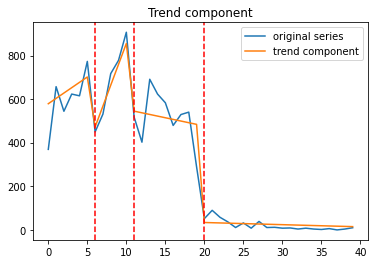

In [8]:
plt.plot(mocking_df.collect()["SERIES"])
plt.plot(components.collect()["TREND"])
for cp in list(tcp.collect()["TREND_CP"]):
    plt.axvline(x=cp, color="red", linestyle='dashed')
plt.legend(['original series', 'trend component'])
plt.title("Trend component")
plt.show()

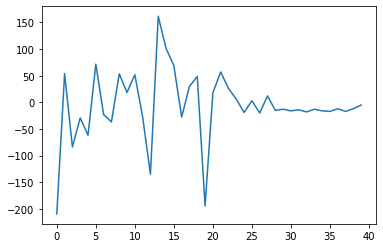

In [9]:
plt.plot(components.collect()["RANDOM"])

## Use Case II : Detecting Changing Trend and Season

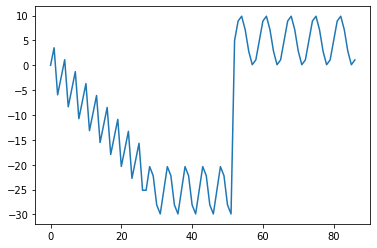

In [10]:
plt.plot(mocking_df2.collect()["SERIES"])

In [11]:
tic = time.perf_counter()
bcpd2 = BCPD(max_tcp=5, 
             max_scp=5, 
             max_harmonic_order=1, 
             max_period=10, 
             max_iter=10000, 
             interval_ratio=0.2, 
             random_seed=1)
tcp2, scp2, period2, components2 = bcpd2.fit_predict(data=mocking_df2)
toc = time.perf_counter()
print('time is %.4f s' % (toc-tic))
print(tcp2.collect())
print(scp2.collect())
print(period2.collect())
print(components2.head(10).collect())

time is 3.8948 s
   ID  TREND_CP
0   1        27
1   2        52
   ID  SEASON_CP
0   1         28
1   2         57
   ID  PERIOD
0   1       3
1   2       5
2   3       7
   ID  SEASONAL     TREND    RANDOM
0   0 -0.021014 -0.508989  0.530003
1   1  4.547965 -1.278076  0.260238
2   2 -4.526951 -2.047163  0.643987
3   3 -0.021014 -2.816249  0.437263
4   4  4.547965 -3.585336  0.167498
5   5 -4.526951 -4.354422  0.551246
6   6 -0.021014 -5.123509  0.344523
7   7  4.547965 -5.892596  0.074758
8   8 -4.526951 -6.661682  0.458506
9   9 -0.021014 -7.430769  0.251783


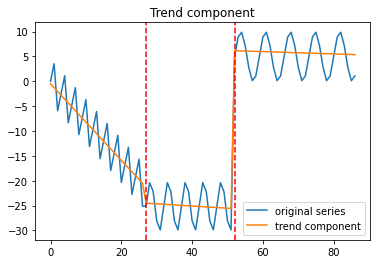

In [12]:
plt.plot(mocking_df2.collect()["SERIES"])
plt.plot(components2.collect()["TREND"])
for cp in list(tcp2.collect()["TREND_CP"]):
    plt.axvline(x=cp, color="red", linestyle='dashed')
plt.legend(['original series', 'trend component'])
plt.title("Trend component")
plt.show()

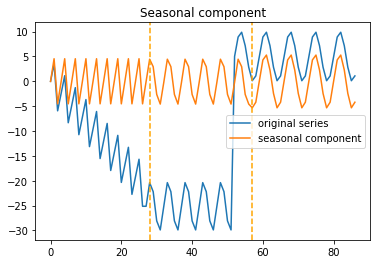

In [13]:
plt.plot(mocking_df2.collect()["SERIES"])
plt.plot(components2.collect()["SEASONAL"])
for cp in list(scp2.collect()["SEASON_CP"]):
    plt.axvline(x=cp, color="orange", linestyle='dashed')
plt.legend(['original series', 'seasonal component'])
plt.title("Seasonal component")
plt.show()

Text(0.5, 1.0, 'Seasonal component')

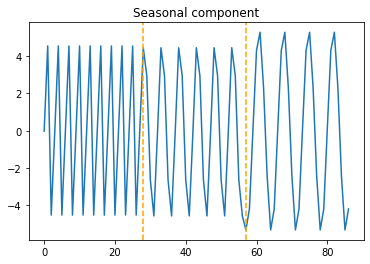

In [14]:
plt.plot(components2.collect()["SEASONAL"], label='trend')
for cp in scp2.collect()["SEASON_CP"]:
    plt.axvline(x=cp, color="orange", linestyle='dashed')
plt.title("Seasonal component")

## Use Case III : Sensor Data Abrupt Change Detection

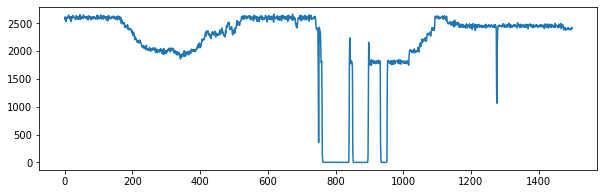

In [15]:
sensor_df = conn.table('PAL_MOCKING_BCPD_DATA_3_TBL') 
figure(num=None, figsize=(10, 3))
plt.plot(sensor_df.collect()["SERIES"])

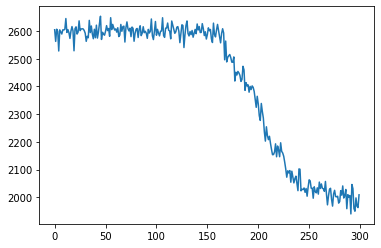

In [16]:
plt.plot(sensor_df.head(300).collect()["SERIES"])

In [ ]:
# trend second order
tic = time.perf_counter()
bcpd3 = BCPD(trend_order=2, max_tcp=10, max_scp=10, max_harmonic_order=10, min_period=1, max_period=50, max_iter=15000, interval_ratio=0.01, random_seed=1)
tcp3, scp3, period3, components3 = bcpd3.fit_predict(data=sensor_df)
toc = time.perf_counter()
print('time is %.4f s' % (toc-tic))
print(tcp3.collect())
print(scp3.collect())
print(period3.collect())
print(components3.head(10).collect())

In [ ]:
figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sensor_df.collect()["SERIES"])
for cp in list(tcp3.collect()["TREND_CP"]):
    plt.axvline(x=cp, color="orange", linestyle='dashed')
for cp in scp3.collect()["SEASON_CP"]:
    plt.axvline(x=cp, color="red", linestyle='dashed')
plt.legend(['sensor data', 'potential abrupt change (trend)', 'potential abrupt change (seasonal)'])
plt.show()

### Denoise the data

In [ ]:
figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(components3.collect()['TREND'] + components3.collect()['SEASONAL'])
plt.show()